<a href="https://colab.research.google.com/github/Swapn2/Data-Science-Learnings/blob/main/Ridge_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [108]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [109]:
x = data.data
y = data.target

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2 , random_state = 42 )

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
lr = LinearRegression()

In [113]:
lr.fit(x_train,y_train)

LinearRegression()

In [114]:
y_pred = lr.predict(x_test)

In [115]:
from sklearn.metrics import r2_score,mean_squared_error

In [116]:
print("r2_score ",r2_score(y_test,y_pred))
print("RMSe", np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score  0.4526027629719195
RMSe 53.85344583676593


In [117]:
from sklearn.linear_model import Ridge

In [118]:
r = Ridge(alpha= .001 )

In [119]:
r.fit(x_train,y_train)
y_pred1 = r.predict(x_test)

In [120]:
print("R2_score",r2_score(y_test,y_pred1))
print("RMSe",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2_score 0.4534280301019329
RMSe 53.81283525336318


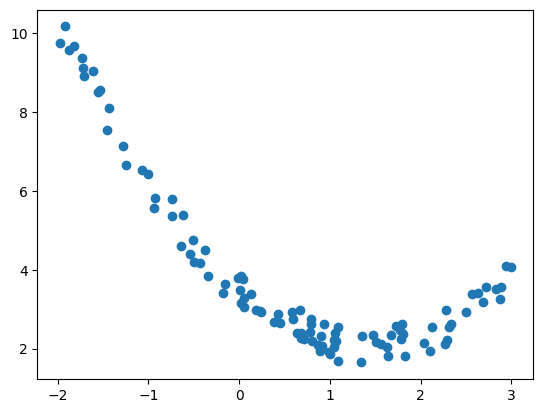

In [121]:
m = 100
x1 = 5*np.random.rand(m,1) -2
x2 = .7 *x1**2 -2*x1 + 3 +np.random.rand(m,1)

plt.scatter(x1,x2)

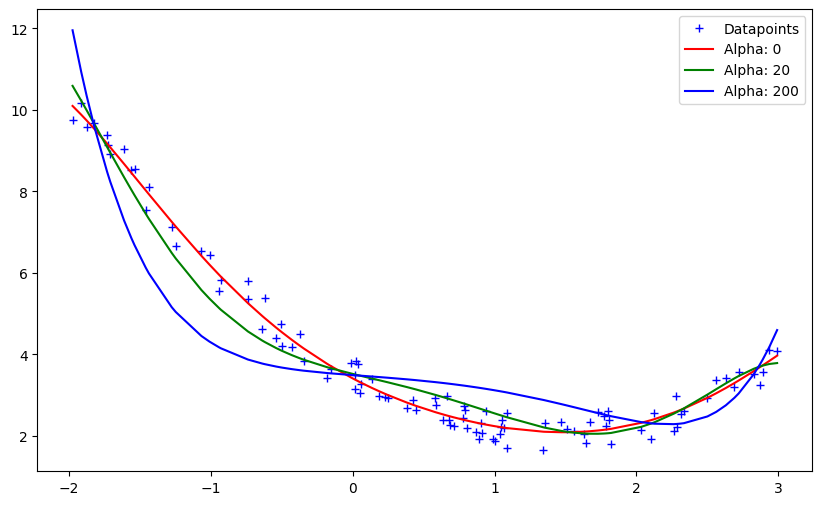

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=6)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()